In [1]:
import numpy as np
import pandas as pd

In [2]:
hr=pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\HR_comma_sep.csv")
hr.shape

(14999, 10)

In [3]:
hr=hr.drop_duplicates(keep="last")
hr.shape

(11991, 10)

In [4]:
hr["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [5]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
hr["satisfaction_level"].skew()

-0.5387016649389444

# hypothesis testing

H0:  The average satisifaction of churn customers is same as the average satisifaction of non churn customers

H1:  The average satisifaction of churn customers is not same as the average satisifaction of non churn customers

In [7]:
hr[hr["left"]==0]["satisfaction_level"].mean()

0.667365

In [8]:
hr[hr["left"]==1]["satisfaction_level"].mean()

0.440271220492215

In [9]:
hr[hr["left"]==0]["satisfaction_level"].var()

0.04712469924492449

In [10]:
hr[hr["left"]==1]["satisfaction_level"].var()

0.07033459976931367

In [11]:
n1=len(hr[hr["left"]==0]["satisfaction_level"])
n1

10000

In [12]:
n2=len(hr[hr["left"]==1]["satisfaction_level"])
n2

1991

In [18]:
s1=(hr[hr["left"]==0]["satisfaction_level"].var())/(n1-1)
s2=(hr[hr["left"]==1]["satisfaction_level"].var())/(n2-1)
print(s1,s2)

4.71294121861431e-06 3.534401998457973e-05


In [19]:
np.sqrt(s1+s2)

0.006329056896820729

In [20]:
(hr[hr["left"]==0]["satisfaction_level"].mean()-hr[hr["left"]==1]["satisfaction_level"].mean())/(np.sqrt(s1+s2))

35.88114046215335

In [17]:
from scipy.stats import ttest_ind
ttest_ind(hr[hr["left"]==0]["satisfaction_level"],hr[hr["left"]==1]["satisfaction_level"])

Ttest_indResult(statistic=40.98502015841721, pvalue=0.0)

# pvalue: 0.0 which means we are 100% confident that satisifaction of churn customers is not same satisifcation of non churn customers

# statstistic: non churn customers satisifaction is overall data 40 times higher than churn customer satisifaction

In [26]:
from scipy.stats import ttest_ind
ttest_ind(hr[hr["left"]==0]["last_evaluation"],hr[hr["left"]==1]["last_evaluation"])

Ttest_indResult(statistic=-1.4804874504607801, pvalue=0.13876948482811344)

In [22]:
# pvalue :0.13--- there is no evidence reject the null hypthesis: last evalution is almost same churners and non churners
# statstics: 1.48 times churn customers last evalution is higher than non churn customers

In [23]:
hr[hr["left"]==0]["last_evaluation"].mean()

0.715667

In [24]:
hr[hr["left"]==1]["last_evaluation"].mean()

0.721783023606228

In [25]:
hr["salary"].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [29]:
hr["salary1"]=np.where(hr["salary"]=="low",1,np.where(hr["salary"]=="medium",2,3))

In [30]:
ttest_ind(hr[hr["left"]==0]["salary1"],hr[hr["left"]==1]["salary1"])

Ttest_indResult(statistic=13.10985569081778, pvalue=5.3601726037378525e-39)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

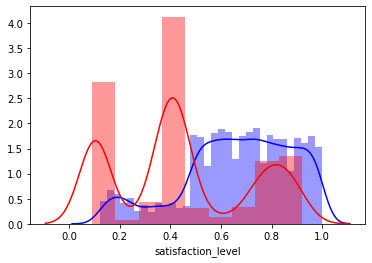

In [33]:
sns.distplot(hr[hr["left"]==0]["satisfaction_level"],color="b")
sns.distplot(hr[hr["left"]==1]["satisfaction_level"],color="r")

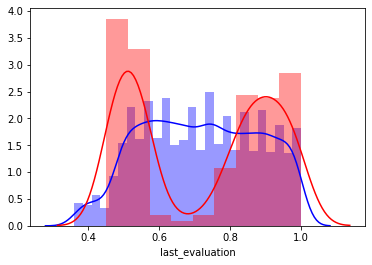

In [34]:
sns.distplot(hr[hr["left"]==0]["last_evaluation"],color="b")
sns.distplot(hr[hr["left"]==1]["last_evaluation"],color="r")

In [35]:
hr["last_evaluation"].skew()

-0.031686075200588235

In [38]:
def normality_check(data):
    col=list(data.columns)
    for i in col:
        if data[i].dtypes!="object":
            if data[i].nunique()>5:
                abc=data[i].skew()
                print("normality of variable",i,"values are",abc)
        

In [39]:
normality_check(data=hr)

normality of variable satisfaction_level values are -0.5387016649389444
normality of variable last_evaluation values are -0.031686075200588235
normality of variable number_project values are 0.3321519865433792
normality of variable average_montly_hours values are 0.027208037002942387
normality of variable time_spend_company values are 1.8165771084344695


In [46]:
def hypothesis_check(data,depedent_col):
    col=list(data.columns)
    for i in col:
        if data[i].dtypes!="object":
            if data[i].nunique()>5:
                from scipy.stats import ttest_ind
                abc=ttest_ind(data[data[depedent_col]==0][i],data[data[depedent_col]==1][i])[1]
                print("variable",i,"values are",abc)

In [47]:
hypothesis_check(data=hr,depedent_col="left")

variable satisfaction_level values are 0.0
variable last_evaluation values are 0.13876948482811344
variable number_project values are 0.0007062542110999652
variable average_montly_hours values are 1.1739390712865618e-14
variable time_spend_company values are 1.745810653156104e-81
